# Kemal Demirel
# 191104091

### Gerekli kütüphaneler import edilir.

In [21]:
import cv2
from PIL import Image
import os
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

### Resimler üzerinde görüntü işleme uygulanır.

Resim belirli bir ölçüye getirilir.

Daha sonra grayscale hale dönüştürülür.

In [5]:
def preprocess_image(image):
    fixed_size = (256, 256)
    image = cv2.resize(image, fixed_size )
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

Bütün directory traverse edilir ve resimlere görüntü işleme uygulanır

In [6]:
def traverse_folder_to_preprocess(path):
    images = []
    for file in os.listdir(path):
        image = cv2.imread(os.path.join(path, file))
        image = preprocess_image(image)
        images.append(image)
    return images

Pokemon preprocessed resimler array'e kaydedilir

In [7]:
# Pokemon resimlerinin bulunduğu path
pokemon_path = os.getcwd()+"/pokemon/"
pokemon_preprocessed_images = traverse_folder_to_preprocess(pokemon_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Query preprocessed resimler array'e kaydedilir

In [8]:
# QI resimlerinin bulunduğu path
qi_path = os.getcwd()+"/QI/"
qi_preprocessed_images = traverse_folder_to_preprocess(qi_path)

libpng warning: iCCP: known incorrect sRGB profile


SIFT işlemleri için sift yaratılır

In [40]:
sift = cv2.SIFT_create()

Pokemon resimlerinin feature'ları sift algoritması ile çıkarılır ve dataset_features array'i içerisine kaydedilir.

In [10]:
dataset_features = []
for image in pokemon_preprocessed_images:
    kp, desc = sift.detectAndCompute(image, None)
    dataset_features.append(desc)

## first create a visual vocabulary by clustering the SIFT features using K-means clustering.

In [11]:
num_clusters = 50  # set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
sift_features = np.vstack(dataset_features)
kmeans.fit(sift_features)
visual_vocabulary = kmeans.cluster_centers_


To find similar images to a given query image, extract its BoF histogram and compare it to the histograms of all other images using a similarity measure such as cosine similarity or Euclidean distance.

In [41]:
def create_bof_histogram(image_features, visual_vocabulary):
    num_clusters = visual_vocabulary.shape[0]
    histogram = np.zeros(num_clusters)
    distances = cosine_similarity(image_features, visual_vocabulary)
    nearest_cluster_indices = np.argmax(distances, axis=1)
    for index in nearest_cluster_indices:
        histogram[index] += 1
    return histogram

Bof histogramları 'bof_histograms' arrayine kaydedilir

In [16]:
bof_histograms = []
for img_features in dataset_features:
    histogram = create_bof_histogram(img_features, visual_vocabulary)
    bof_histograms.append(histogram)

## Rank the images by their similarity to the query image and retrieve the top 3 most similar images.

In [17]:
similarities = []
for query_img in qi_preprocessed_images:
    query_features = sift.detectAndCompute(query_img, None)[1]
    query_histogram = create_bof_histogram(query_features, visual_vocabulary)
    query_histogram = query_histogram.reshape(1, -1)
    similarity = cosine_similarity(query_histogram, bof_histograms)
    similarities.append(similarity)

In [39]:
query_images = []
similar_images = []
for i, similarity in enumerate(similarities):
    ranking = np.argsort(-similarity)
    top3_indices = ranking[0][:3]
    #print(f"Query image {i}:")
    query_images.append(qi_preprocessed_images[i])
    for index in top3_indices:
        #print(f"\tSimilar image: {index}, similarity score: {similarity[0][index]}")
        similar_images.append([pokemon_preprocessed_images[index], similarity[0][index]])

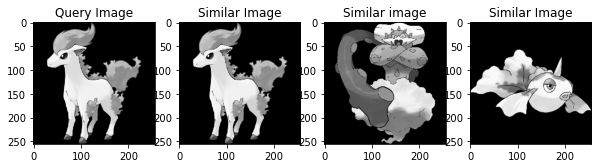

In [30]:
index = 0
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image, cmap='gray')
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1, cmap='gray')
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2, cmap='gray')
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3, cmap='gray')
axs[3].set_title('Similar Image')
plt.show()

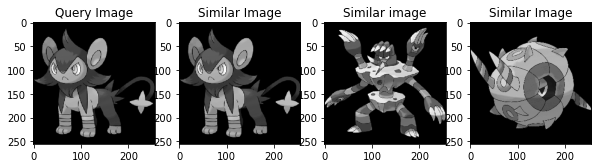

In [31]:
index = 1
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image, cmap='gray')
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1, cmap='gray')
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2, cmap='gray')
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3, cmap='gray')
axs[3].set_title('Similar Image')
plt.show()

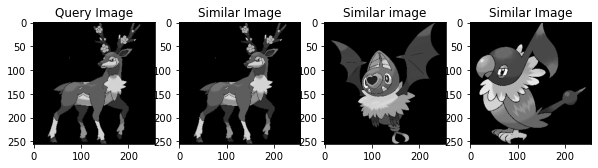

In [32]:
index = 2
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image, cmap='gray')
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1, cmap='gray')
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2, cmap='gray')
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3, cmap='gray')
axs[3].set_title('Similar Image')
plt.show()

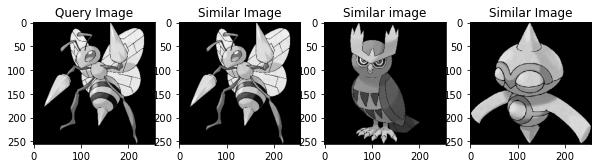

In [33]:
index = 3
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image, cmap='gray')
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1, cmap='gray')
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2, cmap='gray')
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3, cmap='gray')
axs[3].set_title('Similar Image')
plt.show()

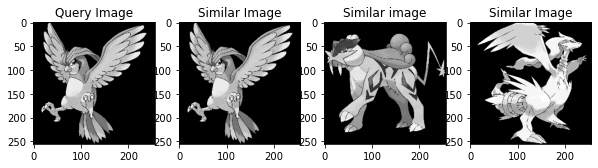

In [34]:
index = 4
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image, cmap='gray')
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1, cmap='gray')
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2, cmap='gray')
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3, cmap='gray')
axs[3].set_title('Similar Image')
plt.show()

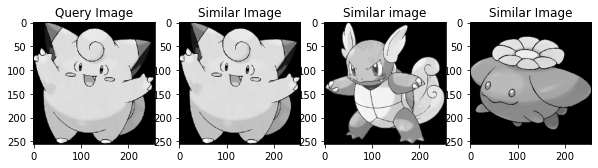

In [35]:
index = 5
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image, cmap='gray')
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1, cmap='gray')
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2, cmap='gray')
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3, cmap='gray')
axs[3].set_title('Similar Image')
plt.show()

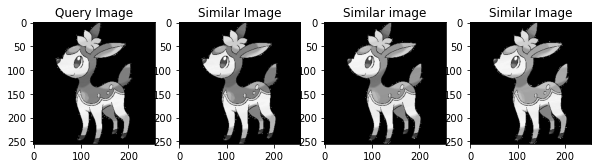

In [36]:
index = 6
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image, cmap='gray')
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1, cmap='gray')
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2, cmap='gray')
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3, cmap='gray')
axs[3].set_title('Similar Image')
plt.show()

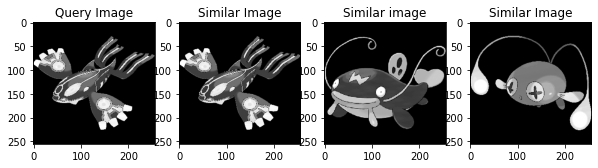

In [37]:
index = 7
query_image = query_images[index]
similar_image1 = similar_images[index*3][0]
similar_image2 = similar_images[index*3+1][0]
similar_image3 = similar_images[index*3+2][0]

fig, axs = plt.subplots(1, 4, figsize=(10, 10))

axs[0].imshow(query_image, cmap='gray')
axs[0].set_title('Query Image')

axs[1].imshow(similar_image1, cmap='gray')
axs[1].set_title('Similar Image')

axs[2].imshow(similar_image2, cmap='gray')
axs[2].set_title('Similar image')

axs[3].imshow(similar_image3, cmap='gray')
axs[3].set_title('Similar Image')
plt.show()